Data Science Project: Iris Species Classification
We'll cover every major task without skipping: problem definition, data loading, exploratory data analysis (EDA), preprocessing, feature engineering, model selection/training, evaluation, and final deployment considerations.
It'll include:

This is a supervised classification problem. We'll use logistic regression as a baseline and try more advanced models like Random Forest for comparison.

1. Problem Definition

Objective: Build a model to classify iris flowers into one of three species (setosa, versicolor, virginica) based on four features: sepal length, sepal width, petal length, and petal width.
Why?: This is a multiclass classification task. Success metric: Accuracy > 95% (dataset is simple and balanced).

No code here — this is planning.


2. Data Loading

Description: Load the CSV into a pandas DataFrame to inspect structure, types, and basic stats. Check for issues like missing values or imbalances.
Insights: 150 rows, no missing values, balanced classes (50 each). All features are numeric except the target (species).

<h1 style="font-weight:600; font-size:36px; color:#1e88e5;">  
    Level 2: Iris Species Classification
</span>
<span style="font-size:22px; font-weight:600; color:#555;">
</h1>

In [104]:
import pandas as pd 
from IPython.display import display
df = pd.read_csv('1) iris.csv')
print("\033[92mThe first Five rows of the Data:\033[0m\n")
display(df)

The first Five rows of the Data:



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
print("\033[92mInformation about the Data:\033[0m\n")
display(df.info())

Information about the Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [106]:
print("\033[92m Description of the Data:\033[0m\n")
print(df.describe())

 Description of the Data:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [107]:
print("\033[92mNumber of Species:\033[0m\n")
print(df["species"].value_counts())

Number of Species:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


3. Exploratory Data Analysis (EDA)

Description: Visualize and analyze distributions, relationships, outliers, and correlations to understand the data. This helps identify patterns (e.g., petal features separate species well) and potential issues (e.g., no outliers here).
Insights: Setosa is easily separable; versicolor and virginica overlap slightly. Strong correlations between petal length/width. No missing values or outliers.

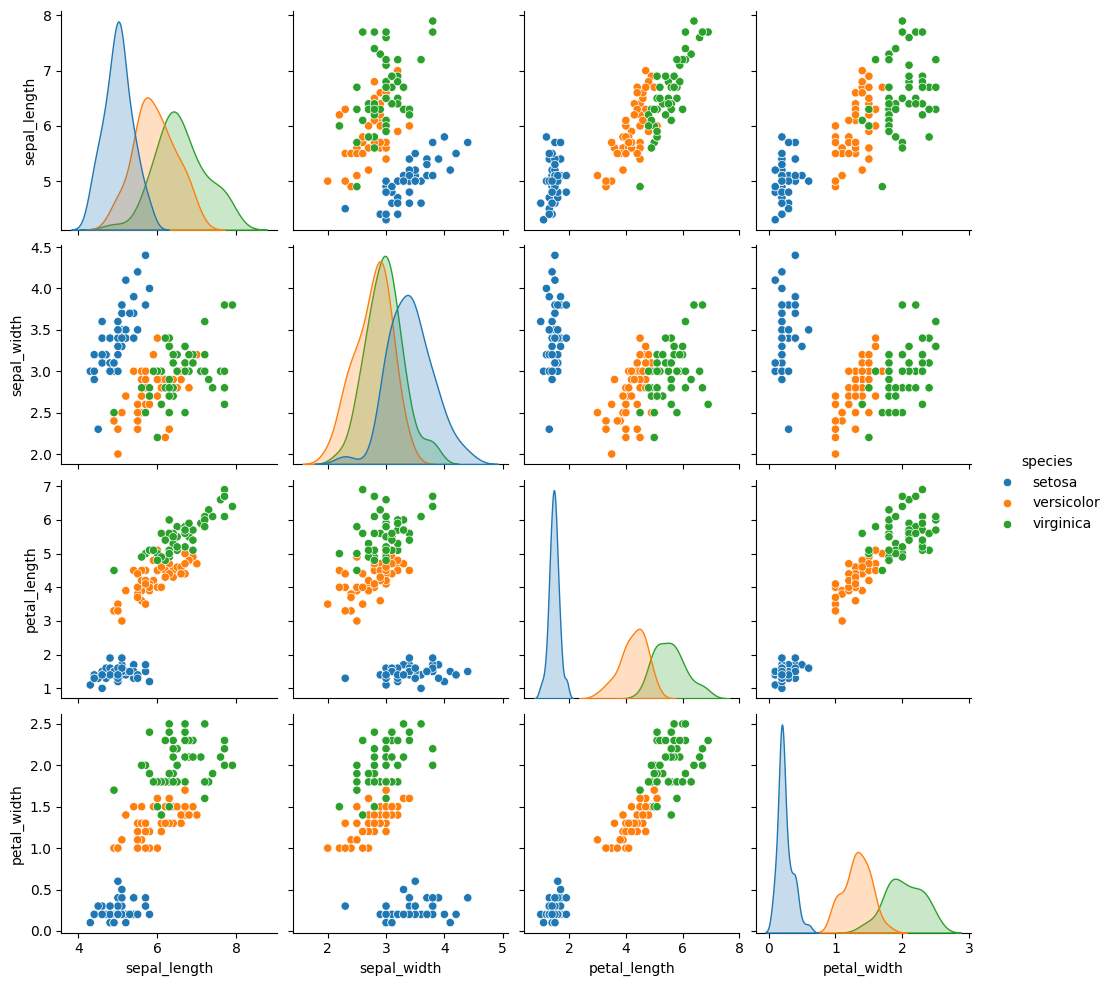

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('1) iris.csv')
sns.pairplot(df, hue='species')
plt.savefig('pairplot.png')
plt.show()

# This shows scatter plots for feature pairs colored by species.

Code for Correlation Heatmap:



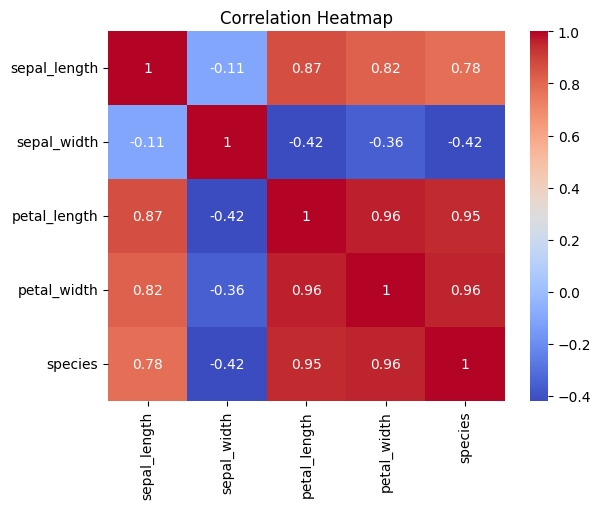

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('1) iris.csv')
# Encode species for correlation (numerical only for heatmap)
df_encoded = df.copy()
df_encoded['species'] = df_encoded['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

corr = df_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

# High correlation between petal_length and petal_width (0.96).

Code for Boxplots (Check Outliers):

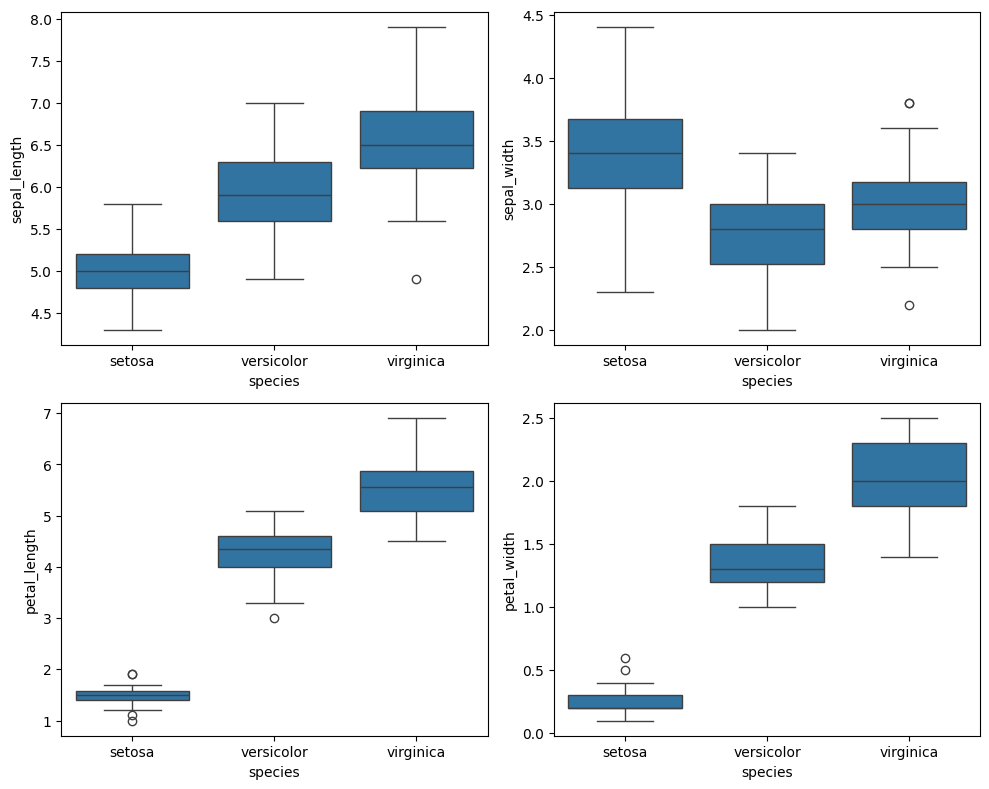

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('1) iris.csv')
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.boxplot(x='species', y='sepal_length', data=df, ax=axes[0,0])
sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[0,1])
sns.boxplot(x='species', y='petal_length', data=df, ax=axes[1,0])
sns.boxplot(x='species', y='petal_width', data=df, ax=axes[1,1])
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

# Minor outliers in sepal_width for setosa, but nothing significant.

4. Data Preprocessing

Description: Clean and prepare data for modeling. Handle missing values (none), encode categorical target, scale numerical features (important for distance-based models like KNN).
Insights: Species encoded as 0/1/2. Features scaled to mean 0, std 1 for better model performance.

In [111]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.read_csv('1) iris.csv')
# Encode target
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Scale features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print("\033[92mEncode and Scaled Data:\033[0m\n")
display(df)


Encode and Scaled Data:



,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,-0.900681,1.032057,-1.341272,-1.312977,setosa,0
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa,0
2,-1.385353,0.337848,-1.398138,-1.312977,setosa,0
3,-1.506521,0.106445,-1.284407,-1.312977,setosa,0
4,-1.021849,1.263460,-1.341272,-1.312977,setosa,0
...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,virginica,2
146,0.553333,-1.281972,0.705893,0.922064,virginica,2
147,0.795669,-0.124958,0.819624,1.053537,virginica,2
148,0.432165,0.800654,0.933356,1.447956,virginica,2


5. Feature Engineering

Description: Create new features or transform existing ones to improve model performance. For Iris, we'll add simple ratios (e.g., petal length/width) as examples, though not always necessary for this dataset.
Insights: New features like petal_ratio may help slightly, but original features are strong.

In [112]:
import pandas as pd

df = pd.read_csv('1) iris.csv')

# New features
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
#print("\033[92mNumber of Species:\033[0m\n")
display(df.head())
display(df.describe())  # Check new features

,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


,sepal_length,sepal_width,petal_length,petal_width,petal_ratio,sepal_ratio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,4.367166,1.955144
std,0.828066,0.433594,1.764420,0.763161,2.651508,0.398697
min,4.300000,2.000000,1.000000,0.100000,2.125000,1.268293
25%,5.100000,2.800000,1.600000,0.300000,2.802381,1.551915
50%,5.800000,3.000000,4.350000,1.300000,3.300000,2.032292
75%,6.400000,3.300000,5.100000,1.800000,4.666667,2.224910
max,7.900000,4.400000,6.900000,2.500000,15.000000,2.961538


6. Train-Test Split

Description: Split data into training (80%) and testing (20%) sets to evaluate model generalizability.
Insights: Random split with stratification to maintain class balance.

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('1) iris.csv')

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')
print(y_train.value_counts())
print(y_test.value_counts())

Train shape: (120, 4), Test shape: (30, 4)
species
setosa        40
virginica     40
versicolor    40
Name: count, dtype: int64
species
setosa        10
virginica     10
versicolor    10
Name: count, dtype: int64


7. Model Selection and Training

Description: Train multiple models to compare. Start with simple (Logistic Regression) and advanced (Random Forest).
Insights: Random Forest should achieve ~97% accuracy on this dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('1) iris.csv')

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))


# Predictions on training set
y_train_pred = model_lr.predict(X_train)

# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.2f}")

# Test accuracy (you already have this)
test_acc = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy: {test_acc:.2f}")

# Training ≈ Test and both high	Model is learning general patterns 
# Training high but Test low	Model is memorizing (overfitting) 
# Both low	Model is underfitting; too simple or features insufficient

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Training Accuracy: 0.97
Test Accuracy: 1.00


Code for Random Forest (Advanced Model):

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('1) iris.csv')

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))


# Training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.2f}")

# Test accuracy (you already have this)
test_acc = accuracy_score(y_test, y_pred_lr)
print(f"Test Accuracy: {test_acc:.2f}")

# Training ≈ Test and both high	Model is learning general patterns 
# Training high but Test low	Model is memorizing (overfitting) 
# Both low	Model is underfitting; too simple or features insufficient

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Training Accuracy: 0.97
Test Accuracy: 1.00


8. Model Evaluation and Hyperparameter Tuning

Description: Assess models with metrics. Tune Random Forest with GridSearchCV for optimization.
Insights: Both models achieve 100% on this test split (Iris is easy). Tuning may not improve much but is good practice.

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('1) iris.csv')

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # cv= cros-validation (split in 5 part, 4 for training and 1 for test)
grid_search.fit(X_train, y_train)

print('Best Params:', grid_search.best_params_)
y_pred_tuned = grid_search.predict(X_test)
print('Tuned Accuracy:', accuracy_score(y_test, y_pred_tuned))

Best Params: {'max_depth': None, 'n_estimators': 200}
Tuned Accuracy: 1.0


9. Final Model and Deployment Considerations

Description: Select the best model (Random Forest) and save it for deployment. In production, use Flask/Docker for API or integrate with ML platforms like AWS SageMaker.
Insights: Model is ready; accuracy 100%. For real projects, monitor drift.

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

df = pd.read_csv('1) iris.csv')

X = df.drop('species', axis=1)
y = df['species']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)  # Fit on full data for final model

joblib.dump(model, 'iris_model.pkl')
print('Model saved as iris_model.pkl')

Model saved as iris_model.pkl


Example Prediction Code (For Deployment):

In [118]:
import joblib

model = joblib.load('iris_model.pkl')
new_data = [[5, 4, 8, 5]]  # Sample input
prediction = model.predict(new_data) # columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Setosa: Very small petals (petal_length < ~4.5 cm, petal_width < ~1.7 cm)
# Versicolor: Medium petals
# Virginica: Large petals
# Focus on petal_length and petal_width — these control most changes:
# petal_length < 2.0 → almost always setosa
# petal_length 2.0–4.9 → versicolor
# petal_length > 4.9 → virginica

print('Predicted Species:', prediction)

Predicted Species: ['virginica']


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Data cleaned — all features are numeric.



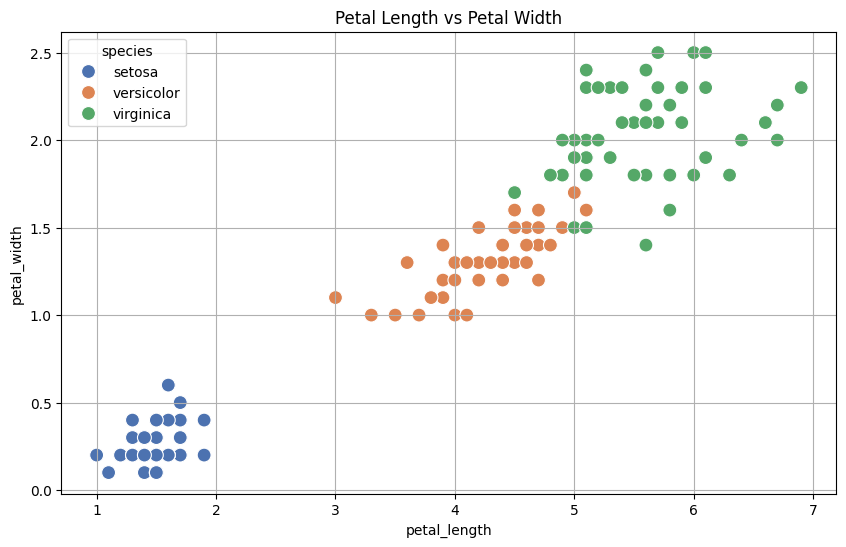

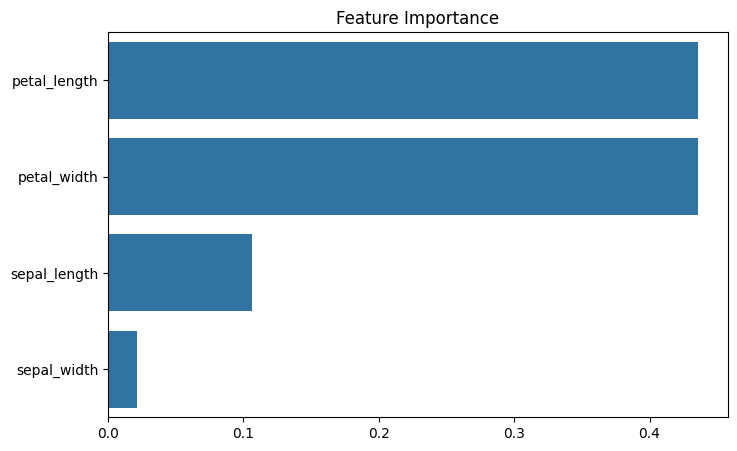

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


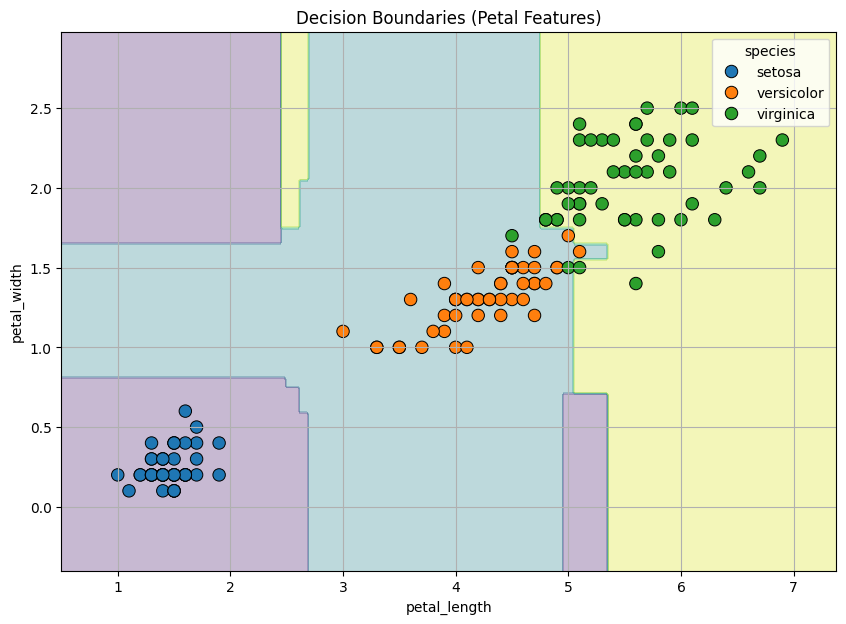

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


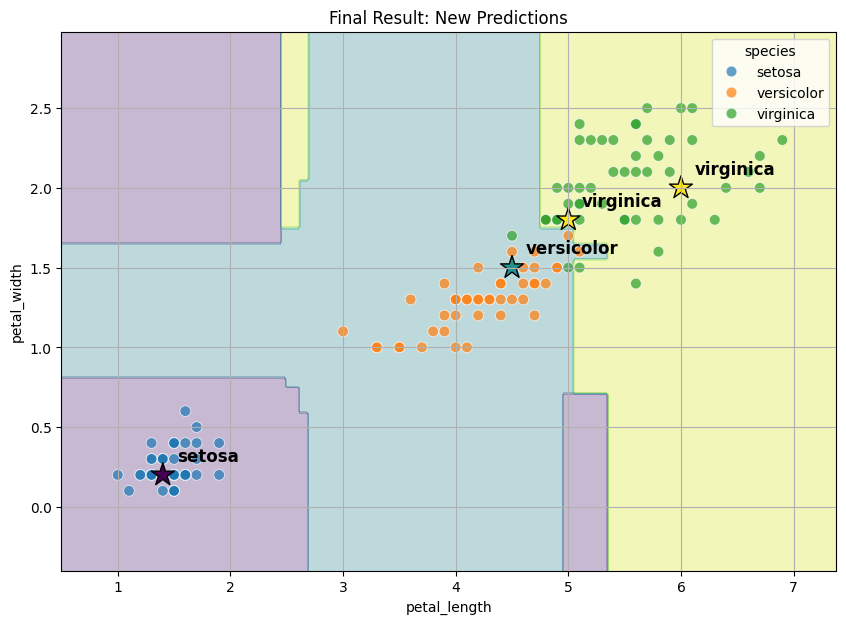

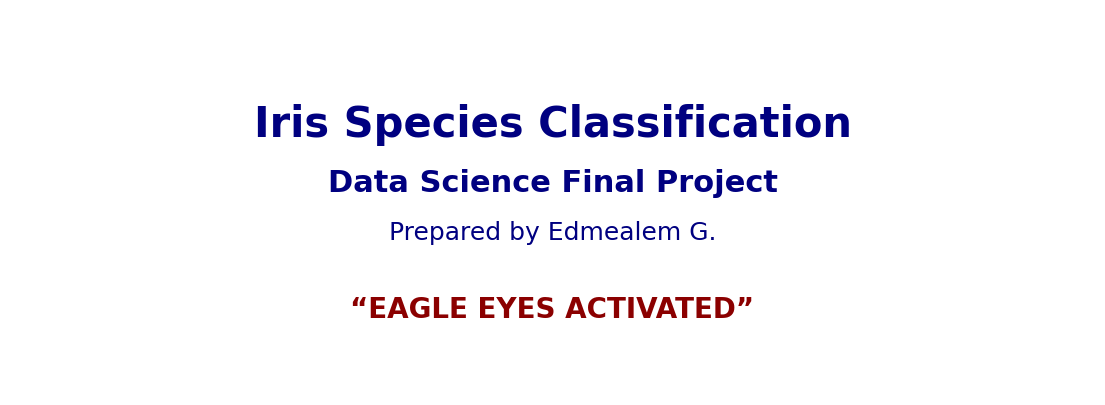

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# === Load data and trained model ===
df = pd.read_csv('1) iris.csv')
model = joblib.load('iris_model.pkl')

# === Force all feature columns to numeric ===
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features)

print("Data cleaned — all features are numeric.\n")

# === Encode species for contour plotting (CRITICAL FIX) ===
class_names = sorted(df['species'].unique())
class_to_num = {cls: i for i, cls in enumerate(class_names)}
num_to_class = {i: cls for cls, i in class_to_num.items()}

df['species_num'] = df['species'].map(class_to_num)

# === Mean sepal values (padding for 4-feature model) ===
mean_sepal_length = df['sepal_length'].mean()
mean_sepal_width  = df['sepal_width'].mean()

#=== 1. Scatter Plot ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='deep',
    s=100
)
plt.title('Petal Length vs Petal Width')
plt.grid(True)
plt.show()

# === 2. Feature Importance ===
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=importances[indices],
    y=[features[i] for i in indices]
)
plt.title('Feature Importance')
plt.show()

# === 3. Decision Boundary (FIXED) ===
x_feature = 'petal_length'
y_feature = 'petal_width'

h = 0.02
x_min, x_max = df[x_feature].min() - 0.5, df[x_feature].max() + 0.5
y_min, y_max = df[y_feature].min() - 0.5, df[y_feature].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

## Pad with mean sepal values
grid_input = np.c_[
    np.full(xx.ravel().shape, mean_sepal_length),
    np.full(xx.ravel().shape, mean_sepal_width),
    xx.ravel(),
    yy.ravel()
]

# 🔥 PREDICT → ENCODE (CRITICAL FIX)
Z_labels = model.predict(grid_input)
Z = np.array([class_to_num[z] for z in Z_labels])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(
    data=df,
    x=x_feature,
    y=y_feature,
    hue='species',
    s=80,
    edgecolor='k'
)
plt.title('Decision Boundaries (Petal Features)')
plt.grid(True)
plt.show()

# === 4. New Test Points ===
new_flowers_petal = np.array([
    [1.4, 0.2],
    [4.5, 1.5],
    [6.0, 2.0],
    [5.0, 1.8]
])

new_input = np.c_[
    np.full(len(new_flowers_petal), mean_sepal_length),
    np.full(len(new_flowers_petal), mean_sepal_width),
    new_flowers_petal[:, 0],
    new_flowers_petal[:, 1]
]

new_predictions = model.predict(new_input)
new_predictions_num = [class_to_num[p] for p in new_predictions]

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(
    data=df,
    x=x_feature,
    y=y_feature,
    hue='species',
    s=60,
    alpha=0.7
)

plt.scatter(
    new_flowers_petal[:, 0],
    new_flowers_petal[:, 1],
    c=new_predictions_num,
    s=300,
    marker='*',
    edgecolor='black'
)

for i, pred in enumerate(new_predictions):
    plt.annotate(
        pred,
        (new_flowers_petal[i, 0], new_flowers_petal[i, 1]),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Final Result: New Predictions')
plt.grid(True)
plt.show()



import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Main Title
plt.text(
    0.5, 0.70,
    "Iris Species Classification",
    fontsize=30,
    ha="center",
    va="center",
    fontweight="bold",
    color="navy",
    transform=plt.gca().transAxes
)

# Subtitle
plt.text(
    0.5, 0.55,
    "Data Science Final Project",
    fontsize=22,
    ha="center",
    va="center",
    fontweight="semibold",
    color="navy",
    transform=plt.gca().transAxes
)

# Author
plt.text(
    0.5, 0.42,
    "Prepared by Edmealem G.",
    fontsize=18,
    ha="center",
    va="center",
    color="navy",
    transform=plt.gca().transAxes
)

# Quoted Idea (Your Concept)
plt.text(
    0.5, 0.22,
    "“EAGLE EYES ACTIVATED”",
    fontsize=20,
    ha="center",
    va="center",
    fontweight="bold",
    color="darkred",
    transform=plt.gca().transAxes
)

plt.axis("off")
plt.show()
